In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('/content/Churn_train.csv')
test_data = pd.read_csv('/content/Churn_test.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [7]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [8]:
print(train_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,5634.00,32.28,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,5634.00,64.78,30.10,18.25,35.40,70.38,89.85,118.65


Convert TotalCharges to Numeric

In [15]:
# Convert TotalCharges to numeric, setting errors='coerce' to handle any issues
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')

# Check missing values
print(train_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


In [17]:
# Fill missing TotalCharges with the median value
train_data['TotalCharges'].fillna(train_data['TotalCharges'].median(), inplace=True)

In [18]:
# Describe numerical features
print(train_data.describe())

# Check churn distribution
print(train_data['Churn'].value_counts(normalize=True) * 100)

       SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count        5634.00 5634.00         5634.00       5634.00
mean            0.16   32.28           64.78       2279.40
std             0.37   24.56           30.10       2265.03
min             0.00    0.00           18.25         18.80
25%             0.00    9.00           35.40        392.77
50%             0.00   29.00           70.38       1394.80
75%             0.00   55.00           89.85       3787.50
max             1.00   72.00          118.65       8684.80
Churn
No    73.00
Yes   27.00
Name: proportion, dtype: float64


Churn Distribution

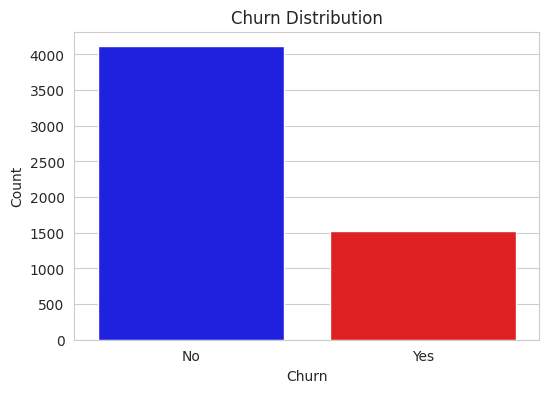

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x=train_data['Churn'], palette=['blue', 'red'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


Histograms for Numerical Features

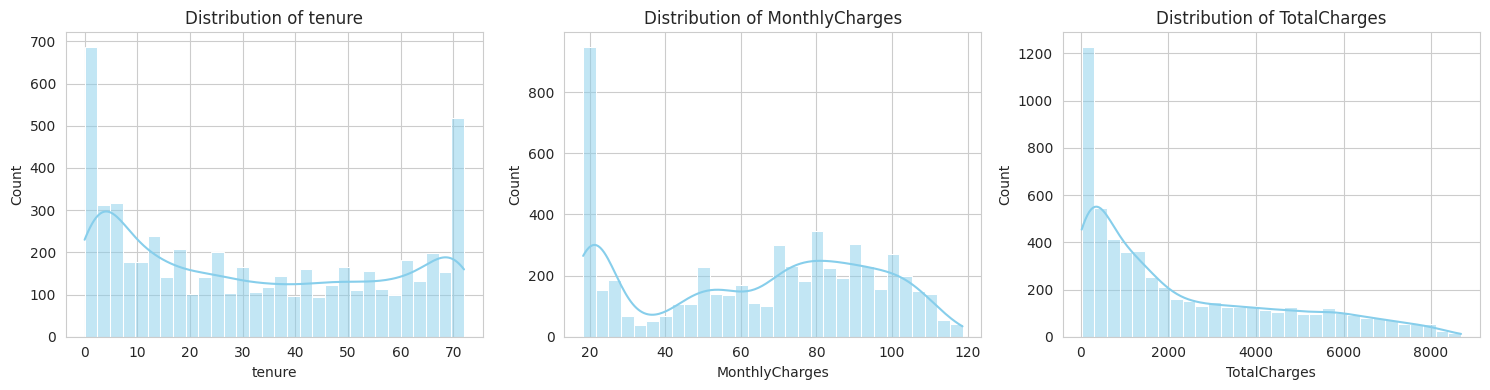

In [20]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(num_features):
    sns.histplot(train_data[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


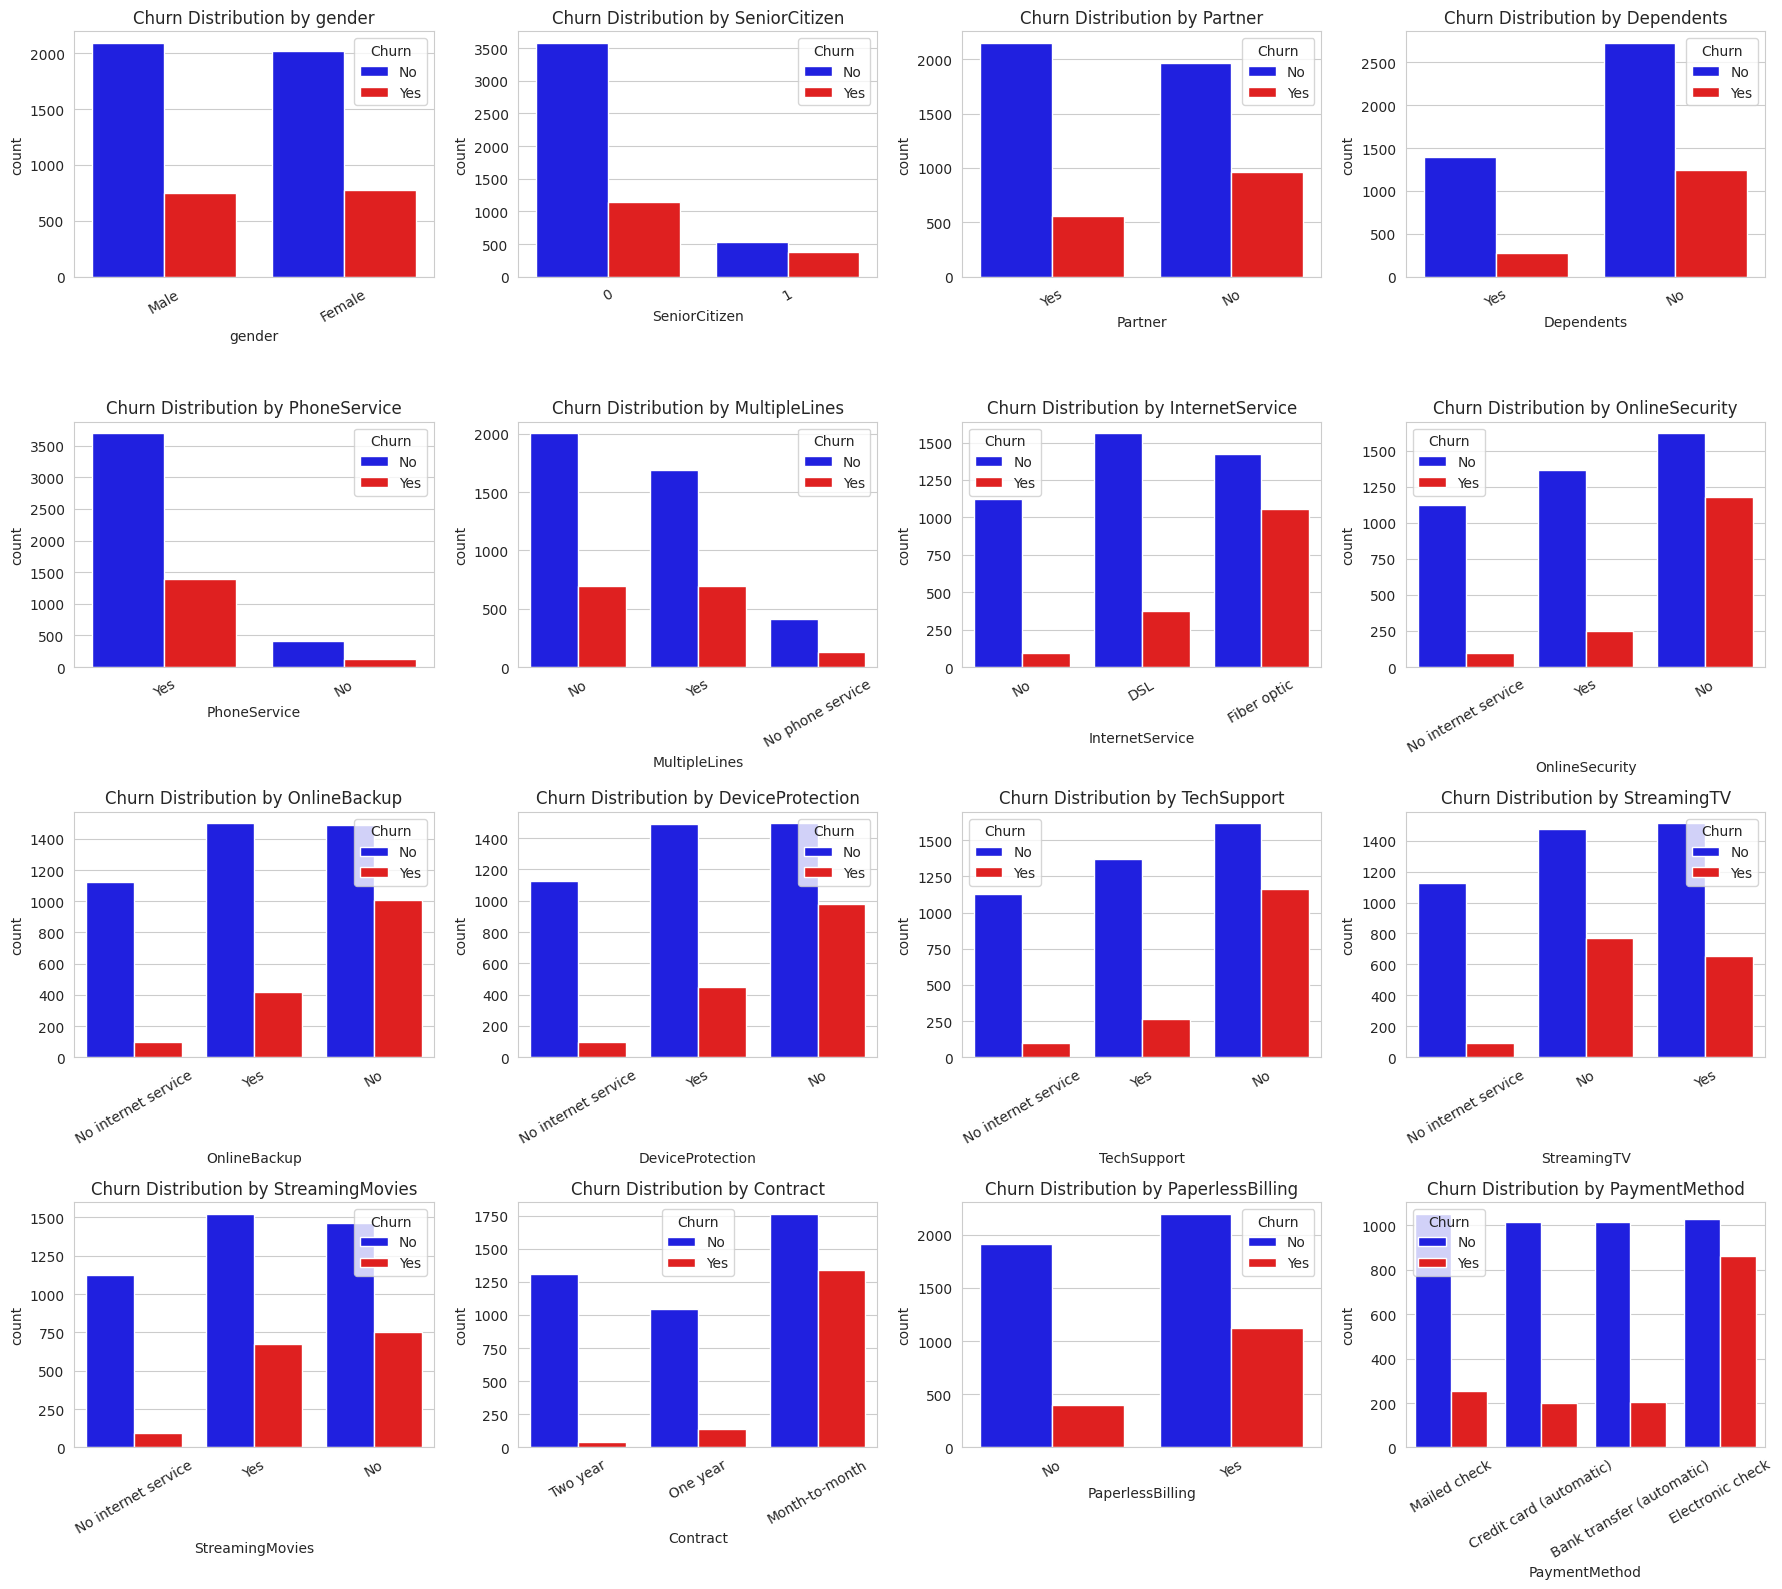

In [21]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4, 4, figsize=(18, 16))

for i, col in enumerate(cat_features):
    ax = axes[i // 4, i % 4]
    sns.countplot(x=train_data[col], hue=train_data['Churn'], ax=ax, palette=['blue', 'red'])
    ax.set_title(f"Churn Distribution by {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


Feature Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_enc = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Exclude customerID
        train_data[col] = label_enc.fit_transform(train_data[col])

train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,1,0,1,1,12,1,0,2,1,...,1,1,1,1,2,0,3,19.70,258.35,0
1,6261-RCVNS,0,0,0,0,42,1,0,0,2,...,2,2,0,2,1,0,1,73.90,3160.55,1
2,2176-OSJUV,1,0,1,0,71,1,2,0,2,...,0,2,0,0,2,0,0,65.15,4681.75,0
3,6161-ERDGD,1,0,1,1,71,1,2,0,2,...,2,2,2,2,1,0,2,85.45,6300.85,0
4,2364-UFROM,1,0,0,0,30,1,0,0,2,...,0,2,2,0,1,0,2,70.40,2044.75,0


Build a Classification Model

In [23]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_data.drop(columns=['Churn', 'customerID'])
y = train_data['Churn']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train a Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

# Evaluate Model
print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print(classification_report(y_val, y_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       823
           1       0.67      0.57      0.62       304

    accuracy                           0.81      1127
   macro avg       0.76      0.73      0.74      1127
weighted avg       0.80      0.81      0.80      1127



Train a Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_val)

# Evaluate Model
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf):.2f}")
print(classification_report(y_val, y_pred_rf))


Random Forest Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       823
           1       0.62      0.45      0.52       304

    accuracy                           0.78      1127
   macro avg       0.72      0.67      0.69      1127
weighted avg       0.76      0.78      0.76      1127



Predict on Test Data

In [27]:
# Preprocess the test dataset
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')
test_data['TotalCharges'].fillna(test_data['TotalCharges'].median(), inplace=True)

for col in test_data.select_dtypes(include=['object']).columns:
    if col != 'customerID':
        test_data[col] = label_enc.fit_transform(test_data[col])

X_test = test_data.drop(columns=['customerID'])


In [28]:
# Make predictions
test_preds = rf_model.predict(X_test)


In [29]:
# Add predictions to test set
test_data['Churn_Prediction'] = test_preds

# Save predictions
test_data[['customerID', 'Churn_Prediction']].to_csv("Churn_Predictions.csv", index=False)